In [38]:
# Install libraries
import pandas as pd 
import praw # for Reddit API interaction
import datetime
import time
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Setting secret credentials
from dotenv import load_dotenv  # pip install python-dotenv
load_dotenv()  # Load environment variables from .env file


True

In [ ]:
df = pd.read_csv('../data/reddit_raw.csv')  # Load the dataset

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  94 non-null     object
 1   title      94 non-null     object
 2   text       94 non-null     object
 3   url        94 non-null     object
 4   created    94 non-null     object
 5   keyword    94 non-null     object
 6   score      94 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 5.3+ KB


In [61]:
df.head()

,subreddit,title,text,url,created,keyword,score
0,ukraine,Volunteering in civilian roles,"Hi,\n\nI’m an American. When the war broke out...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,61
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,540
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,227
3,ukraine,I wrote this letter to my representatives in c...,**Find your representatives here:** [**https:/...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,128
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,14


In [62]:
df['subreddit'].value_counts()

subreddit
IsraelPalestine    50
ukraine            41
politics            3
Name: count, dtype: int64

In [63]:
df[df['subreddit']=='IsraelPalestine'].head()  # Example for specific subreddit

,subreddit,title,text,url,created,keyword,score
44,IsraelPalestine,The Pro-Palestine movement is slowly proving i...,**Important to note:**\n\n \n**I sympathize w...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-07-24 08:31:16,migrant,43
45,IsraelPalestine,Why do Islamic Totalitarian Theocracies get a ...,Just today Arab and Persian sources report on ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-30 00:55:36,migrant,59
46,IsraelPalestine,Myth: Israel Population Mostly Holocaust Refugees,I find the following numbers factual and persu...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-18 20:49:56,migrant,69
47,IsraelPalestine,If the IDF touches Greta thunberg it’s over….,Ya know the other day I was looking into this ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-06-04 19:13:57,migrant,22
48,IsraelPalestine,Is it just me or is Qatar basically everything...,At this point Qatar feels less like a country ...,https://www.reddit.com/r/IsraelPalestine/comme...,2025-05-18 08:38:31,migrant,162


In [64]:
df[df['subreddit']=='ukraine'].head()  # Example for specific subreddit

,subreddit,title,text,url,created,keyword,score
0,ukraine,Volunteering in civilian roles,"Hi,\n\nI’m an American. When the war broke out...",https://www.reddit.com/r/ukraine/comments/1m3v...,2025-07-19 14:54:55,refugee,61
1,ukraine,<3,As a Polish person I just came here to tell yo...,https://www.reddit.com/r/ukraine/comments/1lxf...,2025-07-11 21:03:10,refugee,540
2,ukraine,The Angry Ukrainian Syndrome: Injustice and St...,I found this useful for understanding my own b...,https://www.reddit.com/r/ukraine/comments/1lio...,2025-06-23 20:38:06,refugee,227
3,ukraine,I wrote this letter to my representatives in c...,**Find your representatives here:** [**https:/...,https://www.reddit.com/r/ukraine/comments/1lfq...,2025-06-20 02:45:54,refugee,128
4,ukraine,Looking forward - would love to hear ppl's tho...,"Sorry for the vague question, but I only have ...",https://www.reddit.com/r/ukraine/comments/1kv8...,2025-05-25 19:56:51,refugee,14


In [65]:
df['score'].value_counts()  # Example for specific subreddit]


score
8        4
13       3
12       3
20       3
26       3
        ..
138      1
890      1
36793    1
43       1
16       1
Name: count, Length: 66, dtype: int64

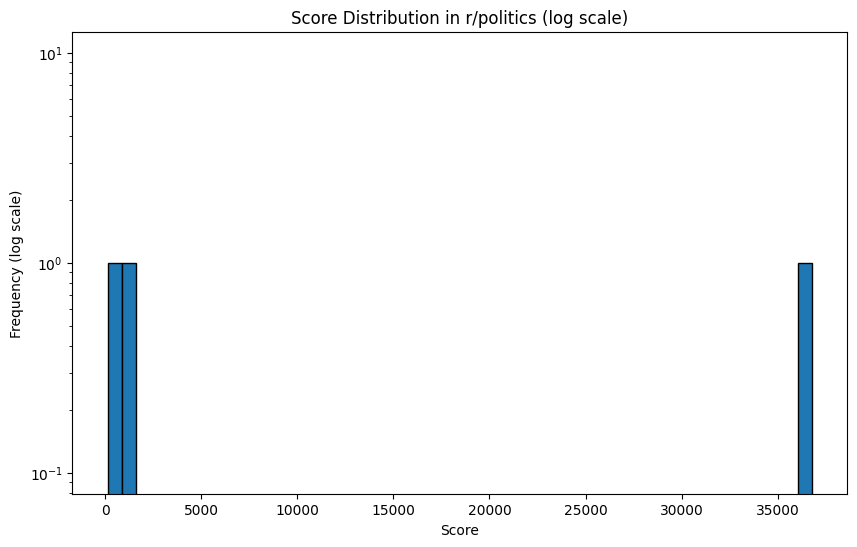

In [66]:
plt.figure(figsize=(10,6))
scores = df[df['subreddit'] == 'politics']['score']
plt.hist(scores, bins=50, log=True, edgecolor='black')
plt.title('Score Distribution in r/politics (log scale)')
plt.xlabel('Score')
plt.ylabel('Frequency (log scale)')
plt.show()

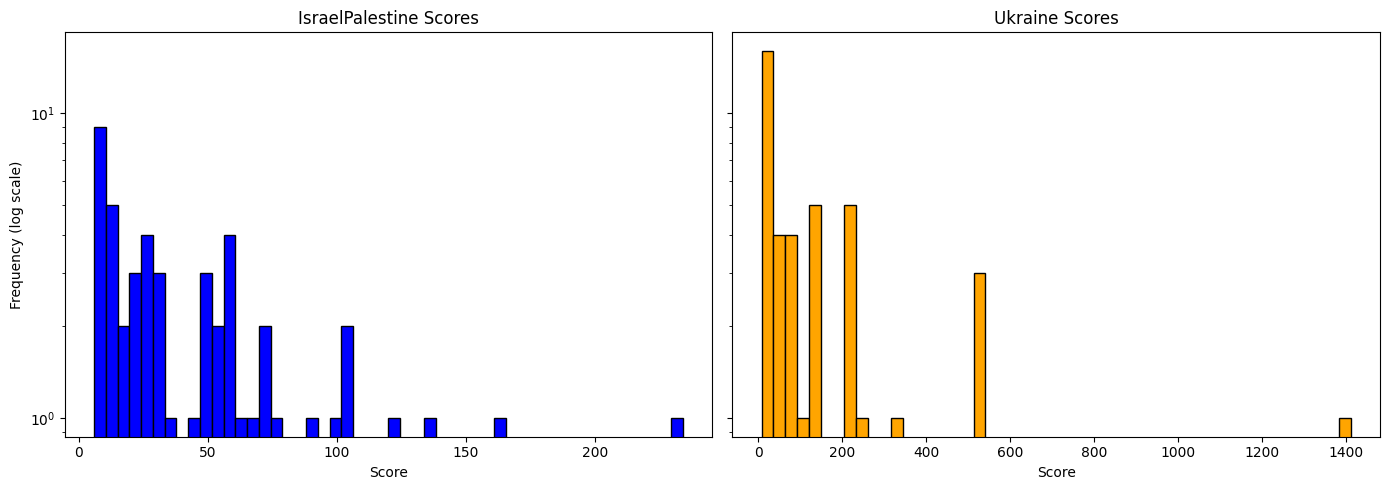

In [67]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
scores_israel = df[df['subreddit'] == 'IsraelPalestine']['score']
scores_ukraine = df[df['subreddit'] == 'ukraine']['score']
axes[0].hist(scores_israel, bins=50, color='blue', edgecolor='black', log=True)
axes[0].set_title('IsraelPalestine Scores')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Frequency (log scale)')

axes[1].hist(scores_ukraine, bins=50, color='orange', edgecolor='black', log=True)
axes[1].set_title('Ukraine Scores')
axes[1].set_xlabel('Score')

plt.tight_layout()
plt.show()


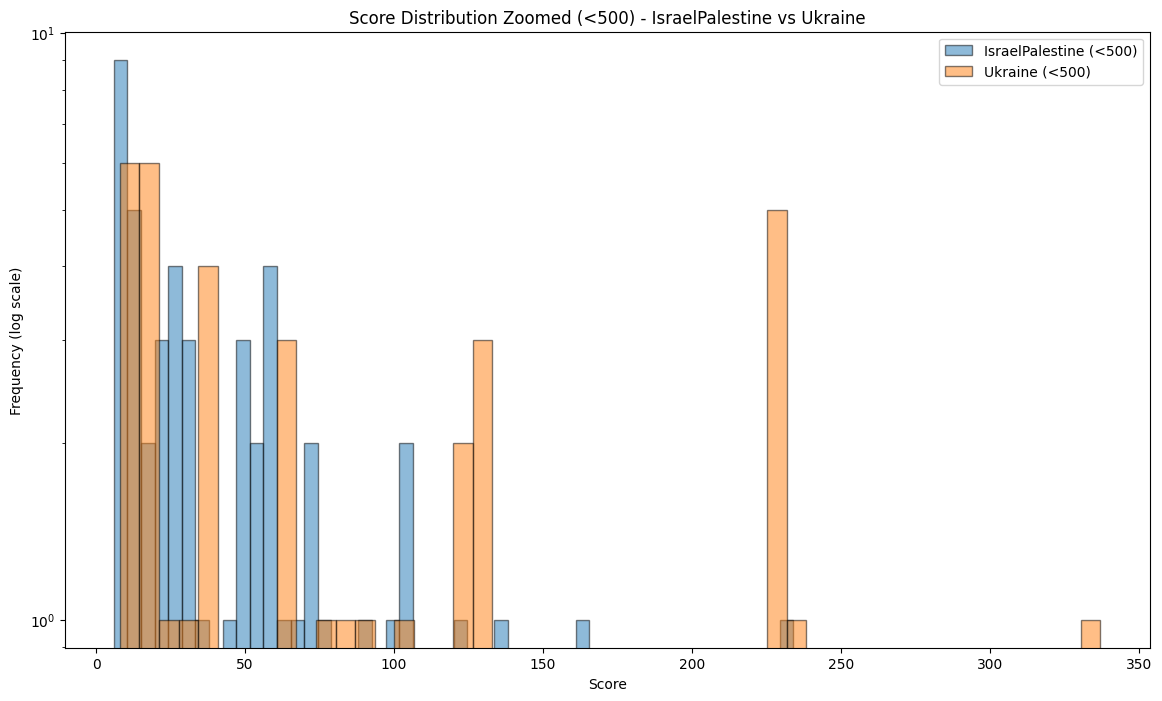

In [68]:
plt.figure(figsize=(14, 8))

plt.hist(scores_israel[scores_israel < 500], bins=50, alpha=0.5, label='IsraelPalestine (<500)', edgecolor='black', log=True)
plt.hist(scores_ukraine[scores_ukraine < 500], bins=50, alpha=0.5, label='Ukraine (<500)', edgecolor='black', log=True)

plt.title('Score Distribution Zoomed (<500) - IsraelPalestine vs Ukraine')
plt.xlabel('Score')
plt.ylabel('Frequency (log scale)')
plt.legend()
plt.show()


Interpretation & implications:

    r/IsraelPalestine appears to have many low-engagement or newly posted items, potentially with more recent or less popular content.

    r/ukraine shows a more varied and engaged set of posts, with more posts earning medium to high scores.

    This may reflect differences in subreddit size, activity, audience engagement, or post longevity.

    It suggests Ukraine discussions might generate broader engagement, while IsraelPalestine posts might be more niche or recently posted.

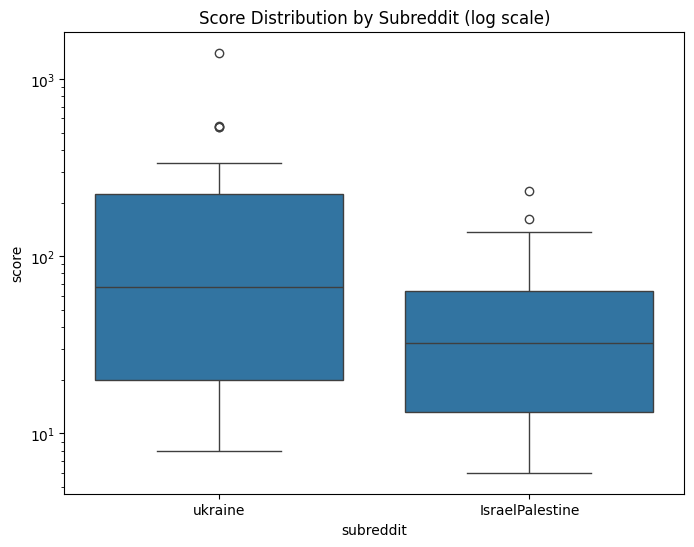

In [70]:
import seaborn as sns

plt.figure(figsize=(8, 6))
subset = df[df['subreddit'].isin(['IsraelPalestine', 'ukraine'])]
sns.boxplot(data=subset, x='subreddit', y='score')
plt.yscale('log')
plt.title('Score Distribution by Subreddit (log scale)')
plt.show()
